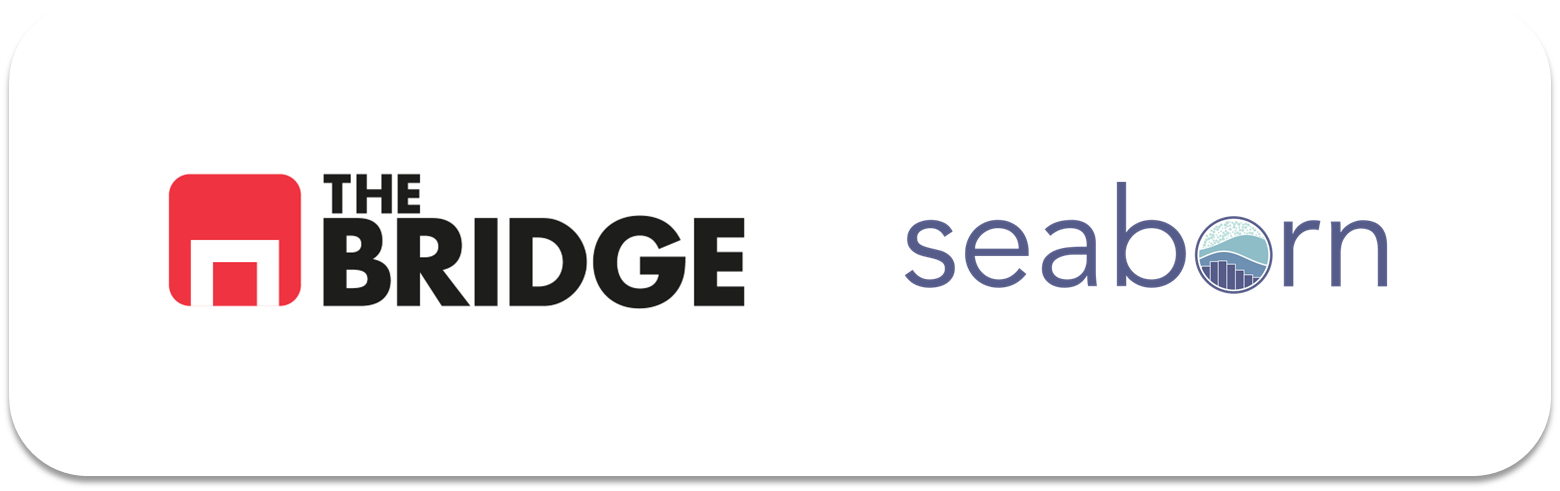

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [80]:
df = pd.read_csv("./data/california_cities.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [81]:
#Limpiamos el dataframe eliminando las filas nulas
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


In [82]:
# Clasificamos nuestras variables
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    return df_temp


df_tipo = card_tipo(df)
print(df_tipo)



                   Card     %_Card     Tipo      tipo_sugerido
Unnamed: 0          427      100.0    int64  Numerica continua
city                427      100.0   object  Numerica continua
latd                420  98.360656  float64  Numerica continua
longd               421  98.594848  float64  Numerica continua
elevation_m         239  55.971897  float64  Numerica continua
elevation_ft        263  61.592506  float64  Numerica continua
population_total    427      100.0    int64  Numerica continua
area_total_sq_mi    417   97.65808  float64  Numerica continua
area_land_sq_mi     424  99.297424  float64  Numerica continua
area_water_sq_mi    209  48.946136  float64  Numerica continua
area_total_km2      423  99.063232  float64  Numerica continua
area_land_km2       425  99.531616  float64  Numerica continua
area_water_km2      248  58.079625  float64  Numerica continua
area_water_percent  203  47.540984  float64  Numerica continua


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [83]:
def scatter_plot_6args(df, num_col, num2_col, cat_col = None, size_col = "", scale = 1, legend = True):

    fig, ax = plt.subplots(figsize = (20,10))
    # Creamos el scatter en función de los argumentos de entrada
    sizes = (100,1000)
    if type(size_col) == str: # So 
        # Comprobamos el argumento size
        if size_col != "": 
            # Comprobamos que realmente haya columna de color
            if cat_col: 
                scatter = sns.scatterplot(x = num_col, y = num2_col, size = df[size_col] * scale, data = df, hue = cat_col, 
                                          alpha = 0.5, palette = "viridis", ax = ax, sizes = sizes)
            else:
                scatter = sns.scatterplot(x = num_col, y = num2_col, size = df[size_col] * scale, data = df, 
                                          alpha = 0.5, palette = "viridis", ax = ax, sizes = sizes)
        elif cat_col:
            scatter = sns.scatterplot(x = num_col, y = num2_col, data = df, hue = cat_col, alpha = 0.5, palette = 'viridis', ax = ax, sizes = sizes)
    else:
        scatter = sns.scatterplot(x = num_col, y = num2_col, size = size_col, data = df, alpha = 0.5, palette ='viridis', ax = ax, sizes = sizes)
    
    if legend:
        ax.legend(ncol = 2, loc="upper right", frameon = False, labelspacing = 2)
    
    ax.set_xlabel(num_col)
    ax.set_ylabel(num2_col)

    return ax

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

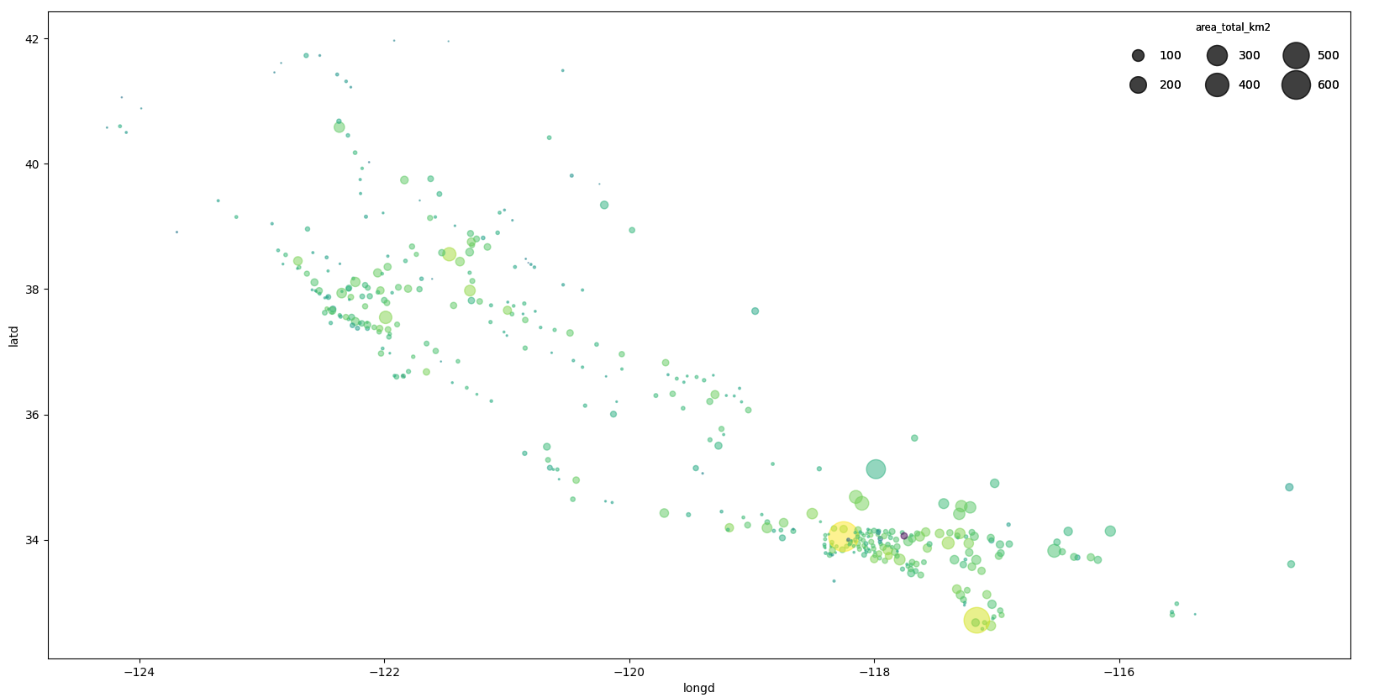

In [84]:
df["log_poblacion"] = np.log10(df["population_total"])
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,log_poblacion
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03,4.501949
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37,4.308137
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01,4.919544
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00,4.679637
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57,3.451326


<Axes: xlabel='longd', ylabel='latd'>

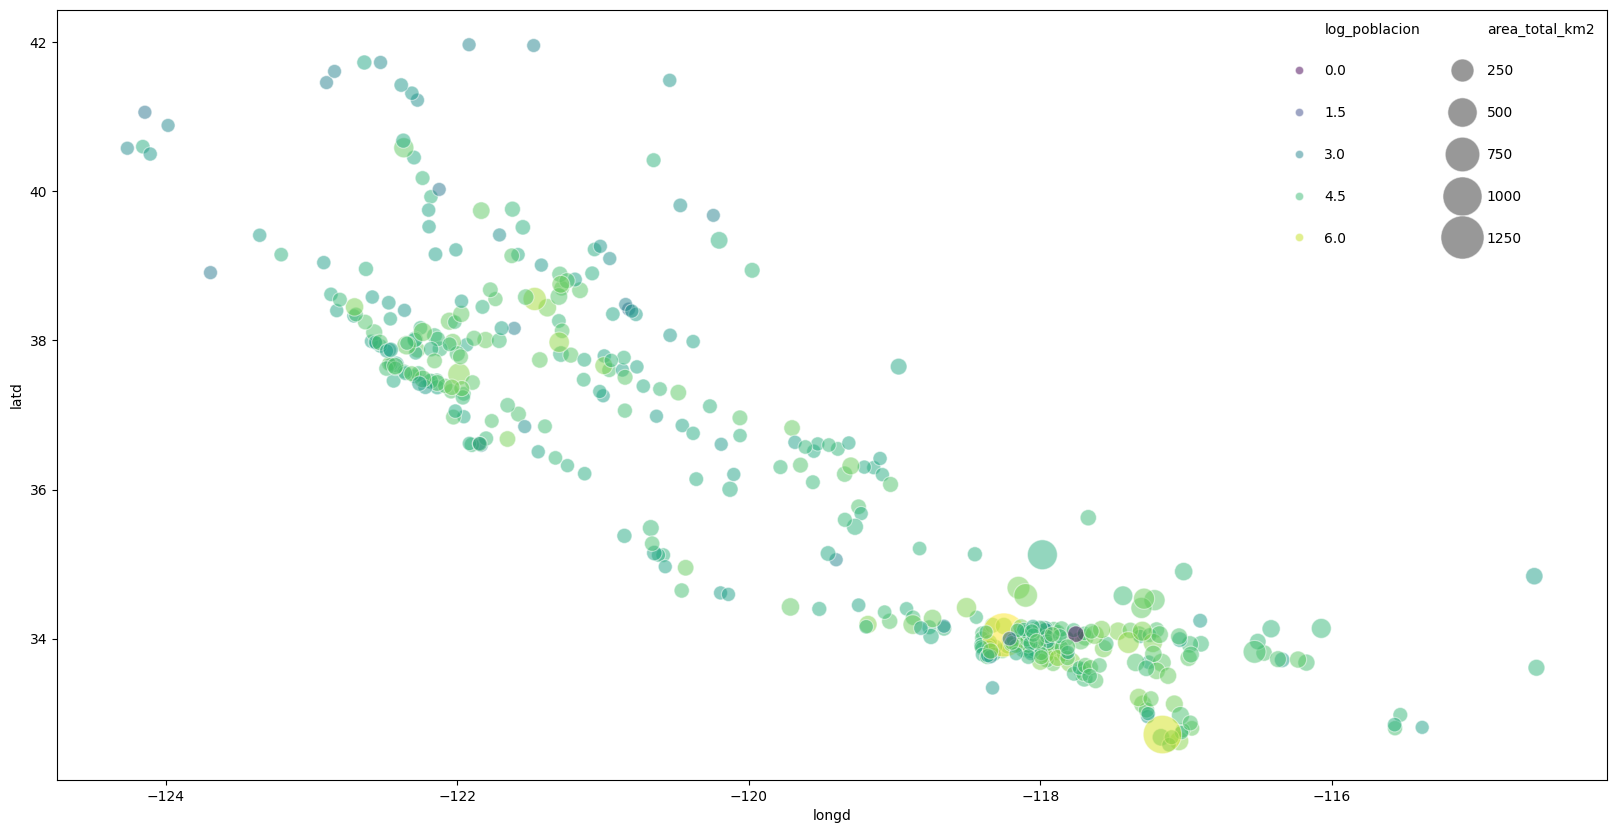

In [85]:
scatter_plot_6args(df, "longd", "latd", cat_col = "log_poblacion", size_col = "area_total_km2", scale = 1, legend = True)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

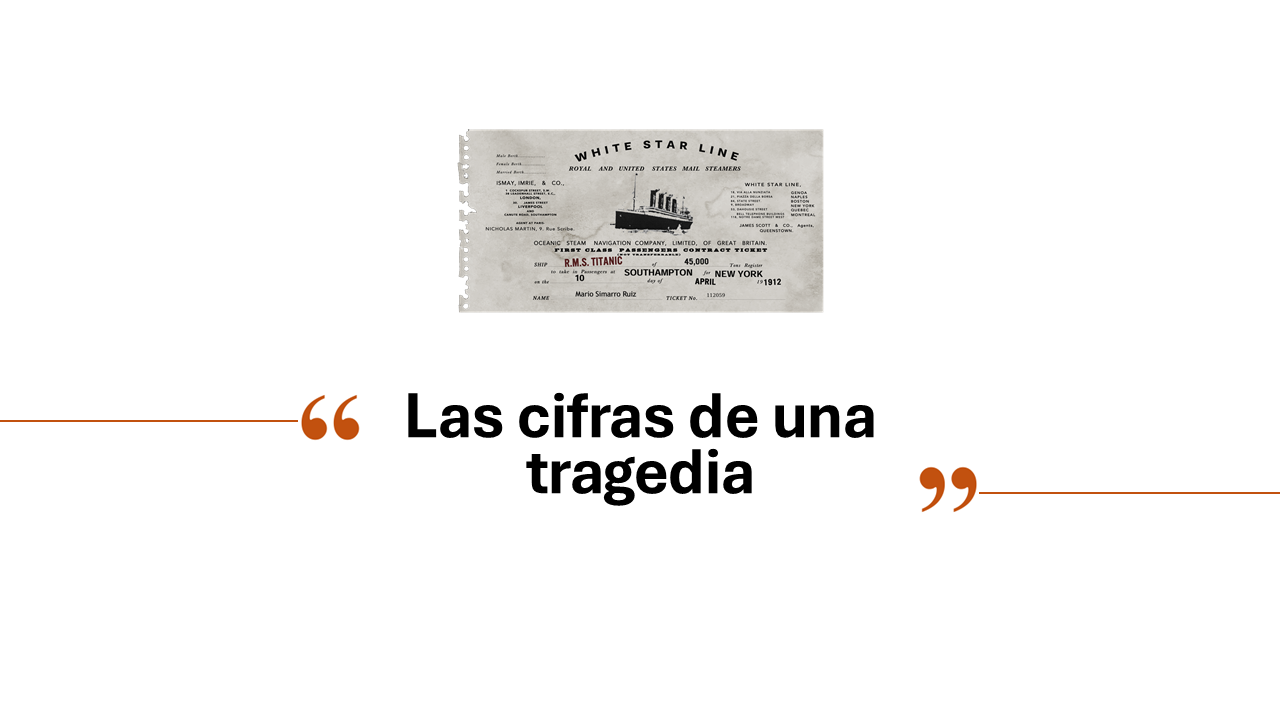

In [102]:
from IPython.display import Image, display
display(Image(filename='./ppt/slides/Diapositiva1.png'))

In [86]:
# 1- El titanic fue un accidente con una tasa de mortalidad alta. 
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.info()
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
# Vamos a clasificar las variables
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    return df_temp


df_tipo = card_tipo(df_titanic)
print(df_tipo)

            Card     %_Card     Tipo      tipo_sugerido
survived       2   0.224467    int64            Binaria
pclass         3     0.3367    int64         Categorica
sex            2   0.224467   object            Binaria
age           88   9.876543  float64  Numerica discreta
sibsp          7   0.785634    int64         Categorica
parch          7   0.785634    int64         Categorica
fare         248  27.833895  float64  Numerica discreta
embarked       3     0.3367   object         Categorica
class          3     0.3367   object         Categorica
who            3     0.3367   object         Categorica
adult_male     2   0.224467     bool            Binaria
deck           7   0.785634   object         Categorica
embark_town    3     0.3367   object         Categorica
alive          2   0.224467   object            Binaria
alone          2   0.224467     bool            Binaria


In [99]:
df_titanic["who"].value_counts(normalize = True)

who
man      0.602694
woman    0.304153
child    0.093154
Name: proportion, dtype: float64

In [97]:
# survived: categórica binaria
df_titanic["survived"].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

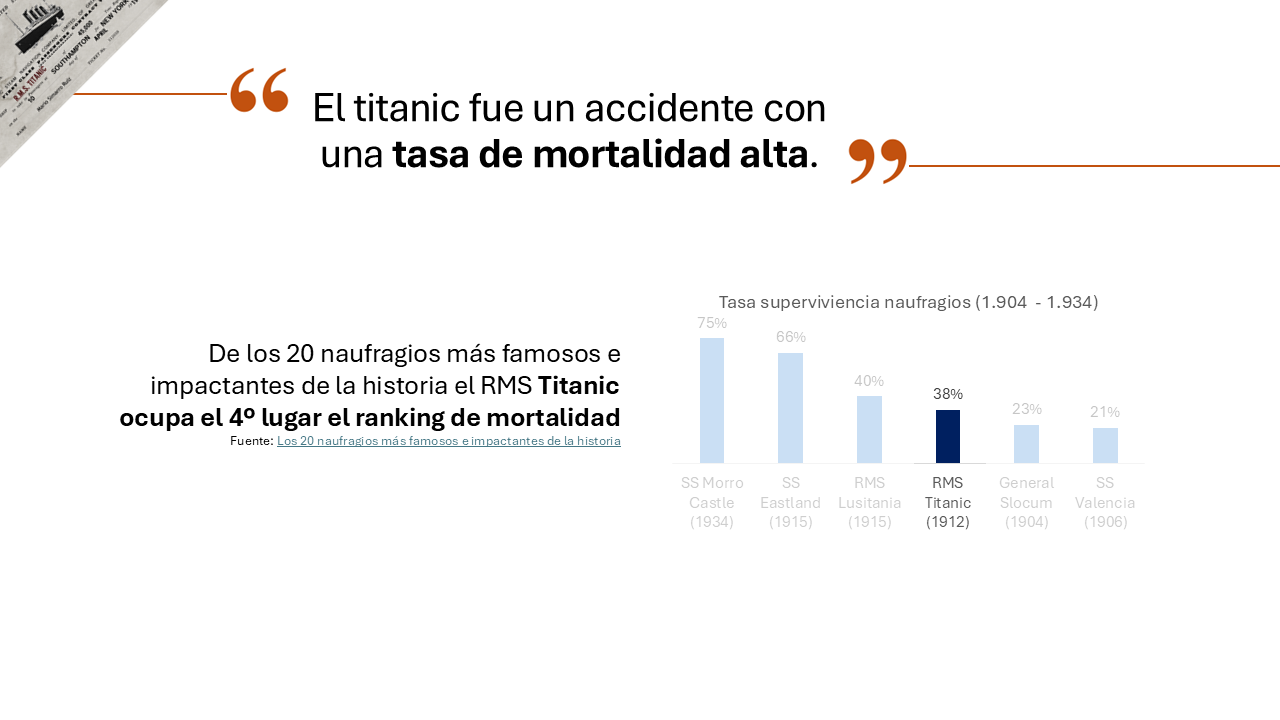

In [103]:
from IPython.display import Image, display
display(Image(filename='./ppt/slides/Diapositiva2.png'))

In [ ]:
# 2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
# who: categórica
df2 = df_titanic.copy()
tabla_contingencia = pd.crosstab(df2["alive"],df2["who"]).T
tabla_contingencia["%_yes"] = (tabla_contingencia["yes"]/(tabla_contingencia["yes"] + tabla_contingencia["no"])).round(3) * 100
tabla_contingencia

alive,no,yes,%_yes
who,,,
child,34,49,59.0
man,449,88,16.4
woman,66,205,75.6


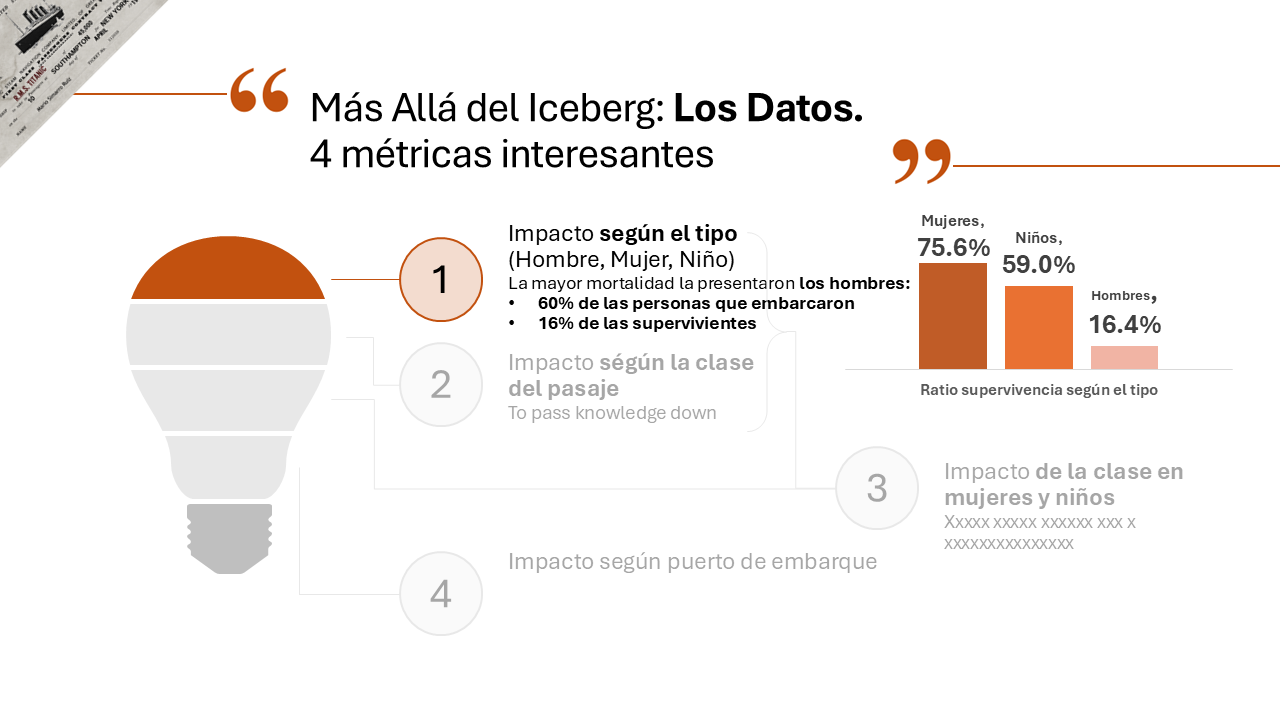

In [104]:
from IPython.display import Image, display
display(Image(filename='./ppt/slides/Diapositiva3.png'))

In [90]:
# 3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
# class: categórica
df3 = df2.copy()
tabla_contingencia = pd.crosstab(df3["alive"],df3["class"]).T
tabla_contingencia["%_yes"] = (tabla_contingencia["yes"]/(tabla_contingencia["yes"] + tabla_contingencia["no"])).round(3) * 100
tabla_contingencia

alive,no,yes,%_yes
class,,,
First,80,136,63.0
Second,97,87,47.3
Third,372,119,24.2


In [100]:
df_titanic["class"].value_counts(normalize = True)

class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64

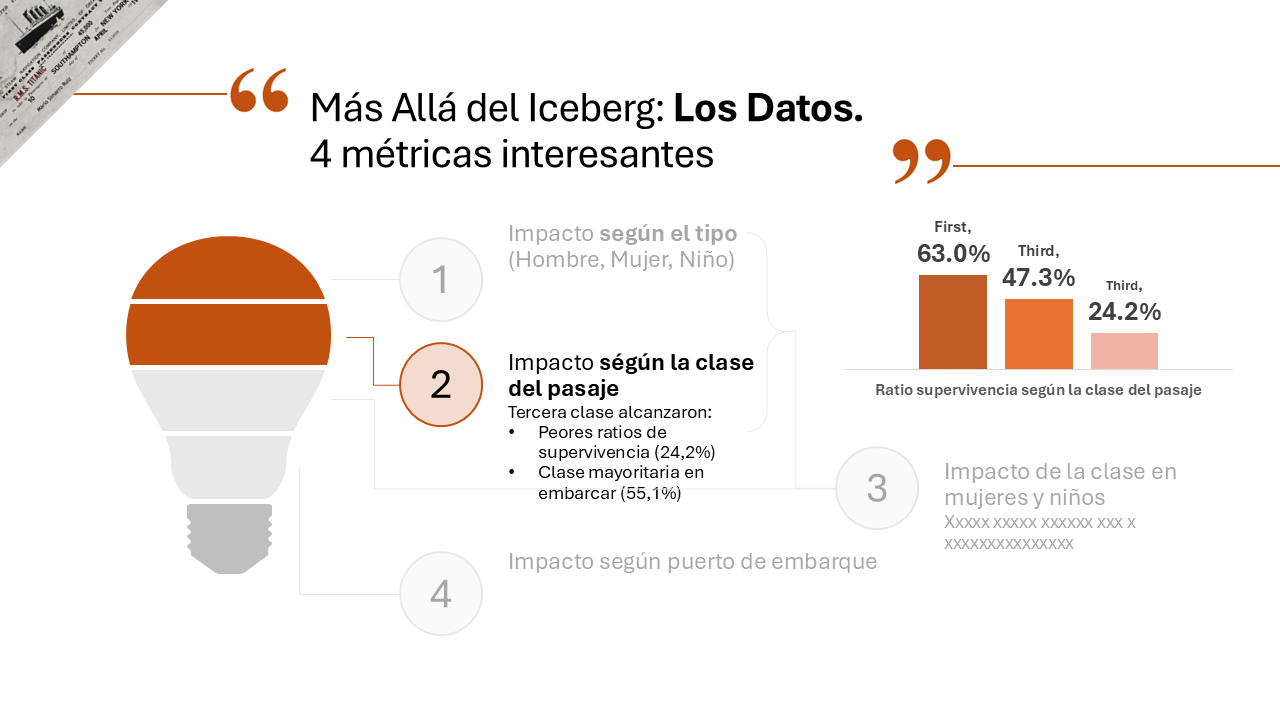

In [105]:
from IPython.display import Image, display
display(Image(filename='./ppt/slides/Diapositiva4.png'))

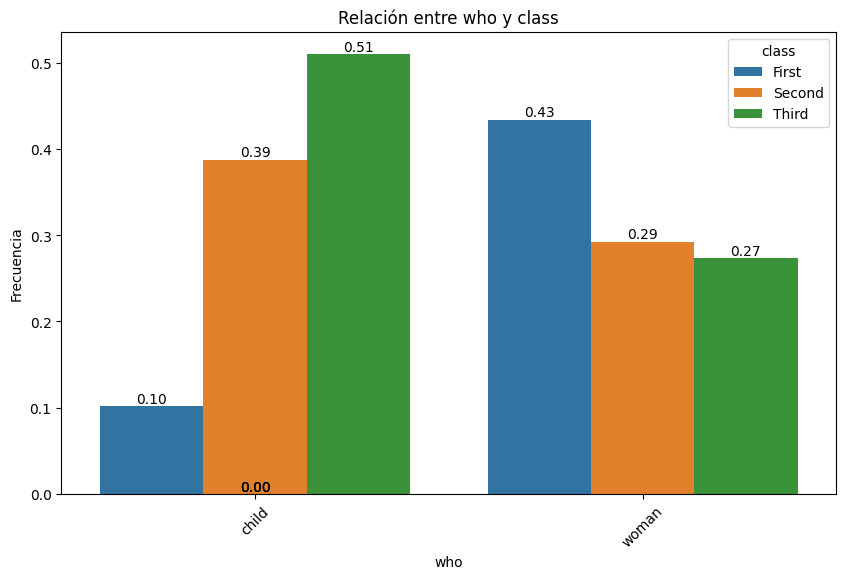

In [91]:
#4- ... las diferencias de tasas de supervivencia entre mujeres y niños. 
# who: variable categórica que indica si es hombre, mujer o niño
# class: variable categórica que indica la clase en la que viaja
df4 = df2.loc[(df2.who.isin(["child", "woman"])) & (df2.alive == "yes")]
from bootcampviztools import plot_categorical_relationship_fin

plot_categorical_relationship_fin(df4, "who","class", relative_freq = True, show_values = True)

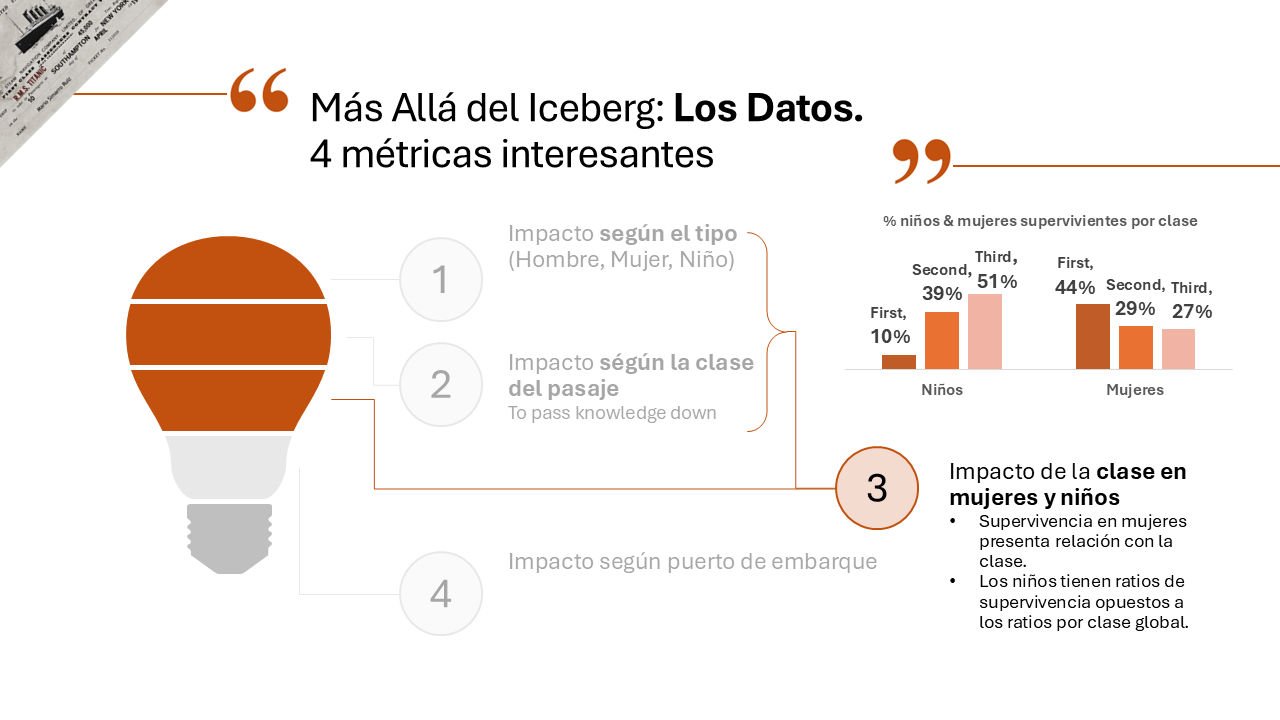

In [106]:
from IPython.display import Image, display
display(Image(filename='./ppt/slides/Diapositiva5.png'))

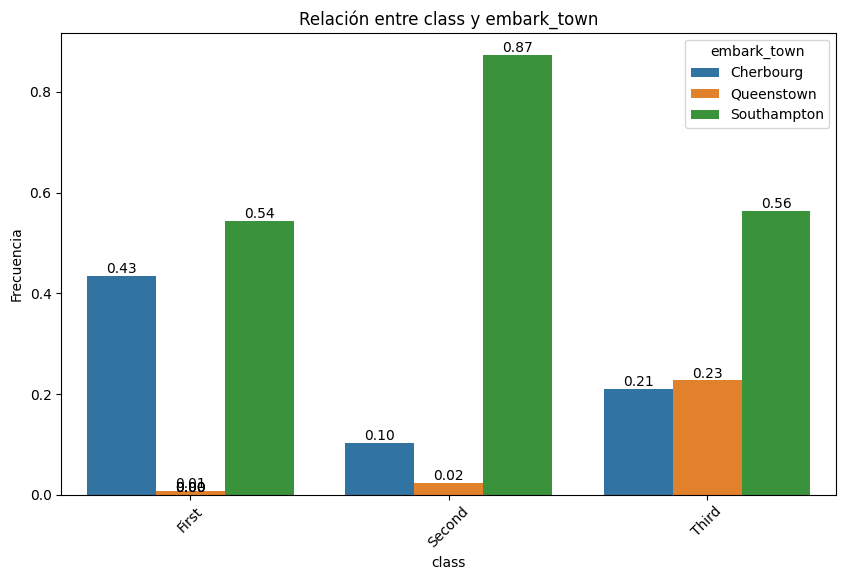

In [94]:
# 5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  
# embark_town: categórica
# class: categórica
df5 = df_titanic.loc[(df_titanic.survived == 1)]
from bootcampviztools import plot_categorical_relationship_fin
plot_categorical_relationship_fin(df5, "class", "embark_town", relative_freq = True, show_values = True)

In [95]:
tabla_contingencia = pd.crosstab(df_titanic["class"],df_titanic["embark_town"]).T
tabla_contingencia["Total"] = tabla_contingencia["First"]+tabla_contingencia["Second"] + tabla_contingencia["Third"]
tabla_contingencia

class,First,Second,Third,Total
embark_town,,,,
Cherbourg,85,17,66,168
Queenstown,2,3,72,77
Southampton,127,164,353,644


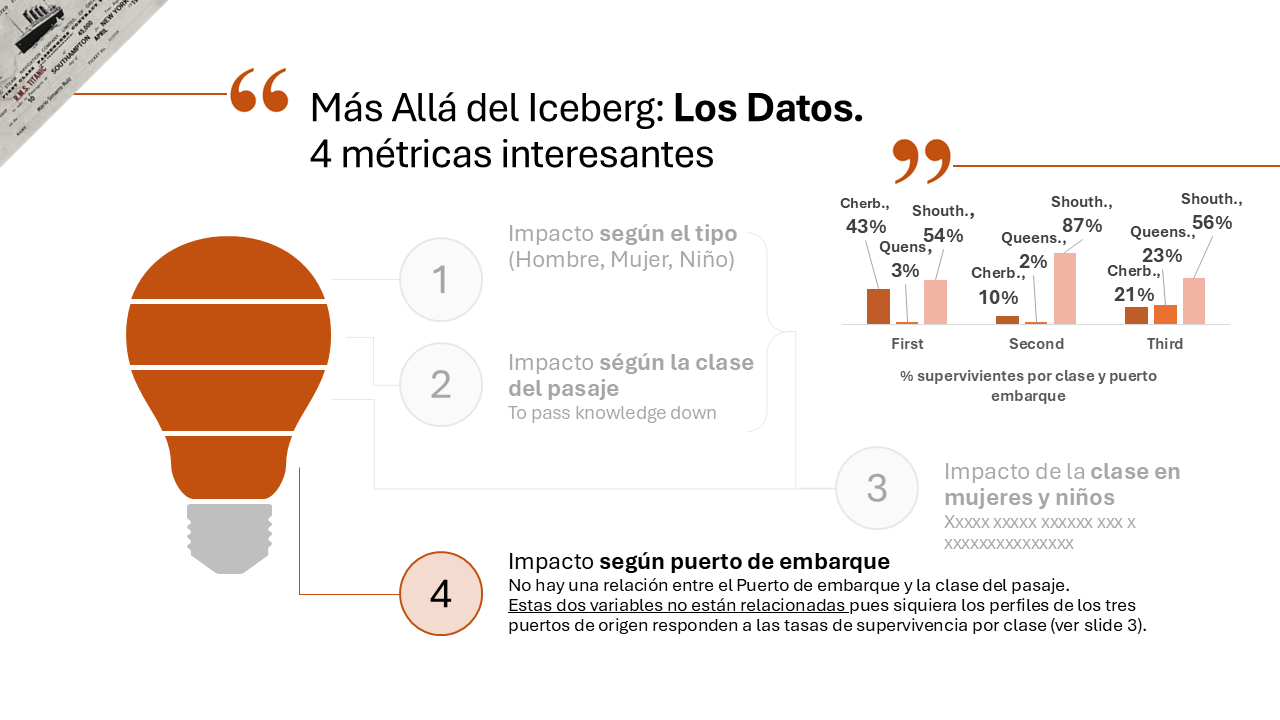

In [107]:
from IPython.display import Image, display
display(Image(filename='./ppt/slides/Diapositiva6.png'))